Michael Lepore

CS548 Homework 2

## Problem (6a)

> (a) (3 points) Assuming that the missing value (marked with “?”) in GDPPC cannot
be ignored, discuss 3 diﬀerent alternatives to fill in that missing value. In each case,
state what the selected value would be and the advantages and disadvantages of
the approach. You may assume that the SWL attribute is the target attribute.

Approach 1) Set it to the mean of the GDPPC
Pro: Gives us a way to operate with some data
Con: Its likely that per-capita GDP is high in USA not at the mean.
Value: 18.2

Approach 2) Pick a value of another row that is similar in LIFE-EXP (Germany)
Pro: Will likely give us more accurate data (US has both high GDP and high Life Expentancy)
Con: We are using outside knowledge to make the prediction, and assumes that LIFE-EXP is related to GDPPC
Value: Somewhere around 30.5

Approach 3) Similar to #2, pick a value that is close to other values of AC-S-ED.
Pro: Gives us data
Con: AC-S-ED seems less correlated with some weird outliers, and there aren't as close matches, also seems like Brazil might through it off because it has high AC-S-ED, but low GDPPC unlike others
Value: Somewhere around 20


## Problem (6b)
> (3 points) Would you keep the attribute COUNTRY in your dataset when mining
for patterns that predict the values for the SWL attribute? Explain your answer._

I wouldn't keep it.  Because it is a discrete value and unique to each row it isn't useful in predicting the answer

## Problem (6c)
> (c) (3 points) Describe a reasonable transformation of the attribute COUNTRY so that
the number of diﬀerent values for that attribute is reduced to just 4.

I would use a lookup table to convert COUNTRY to CONTINENT.
Values would be NA, SA, EUROPE, ASIA

## Problem (6d)

> (d) (3 points) Discretize the AC-S-ED attribute by binning it into 4 equi-width inter-
vals using unsupervised discretization. Perform this discretization by hand (i.e., do
not use any software tools). Explain your answer.

We want each bin to be the same size, so..

    ACS-S-ED min = 5.2 
    ACS-S-ED max = 108.7 
    ACS-S-ED range = 103.5
    Bucket width = 103.5 / 4 = 25.875

    Bin 1 = 5.2:31.075
    Bin 2 = 31.075:56.95
    Bin 3 = 56.95:82.825
    Bin 4 = 82.825:108.7

    Bin 1 = Ethopia (5.2)
    Bin 2 = India (49.9)
    Bin 3 = Mexico (73.4), Thailand (79), Russia (81.9)
    Bin 4 = Switzerland (99.9), Canada (102.6), USA (94.6), Germany (99.9), France (108.7), Brazil (103.2), Japan (102.1)

## Problem (6e)

> (e) (3 points) Discretize the AC-S-ED attribute by binning it into 4 equi-depth (=
equal-frequency) intervals using unsupervised discretization. Perform this discretiza-
tion by hand (i.e., do not use any software). Explain your answer.

    We want the same number of values per bin, so..
    Number of values = 12
    Number of bins = 4
    Number of entries per bin = 3

    Bin 1 = Ethopia (5.2), India (49.9), Mexico (73.4)
    Bin 2 = Thailand (79), Russia (81.9), Switzerland (99.9)
    Bin 3 = Canada (102.6), USA (94.6), Germany (99.9)
    Bin 4 = France (108.7), Brazil (103.2), Japan (102.1)

# Problem 7
> (20 points) Consider Auto Dataset available on the Kaggle website. Load the dataset
into a Jupyter notebook.

## Problem (7a)
> (2 points) Make the attributes mpg, displacement, horsepower, weight, and accel-
eration continuous. Make the attributes cylinders, model-year, and origin discrete;
Make the attribute car-name string.

In [77]:
# lets load the auto-mpg file, look at it

import pandas as pd

df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [78]:
# now lets configure the various column types

for attr in [ 'mpg', 'displacement', 'horsepower', 'weight', 'acceleration' ]:
    df[attr] = pd.to_numeric(df[attr], downcast='float', errors='coerce')


for attr in [ 'cylinders', 'model year', 'origin' ]:
    df[attr] = pd.to_numeric(df[attr], downcast='integer', errors='coerce')

df['car name'] = df['car name'].astype(str)

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


## 7(b)

> (2 points) Start by familiarizing yourself with the dataset. Carefully look at the
data directly (for this, use Python functionality to explore and visualize the data).
Describe in your report your observations about what is good about this data
(mention at least 2 diﬀerent good things), and what is problematic about this data
(mention at least 2 diﬀerent bad things). If appropriate, include visualizations of
those good/bad things.

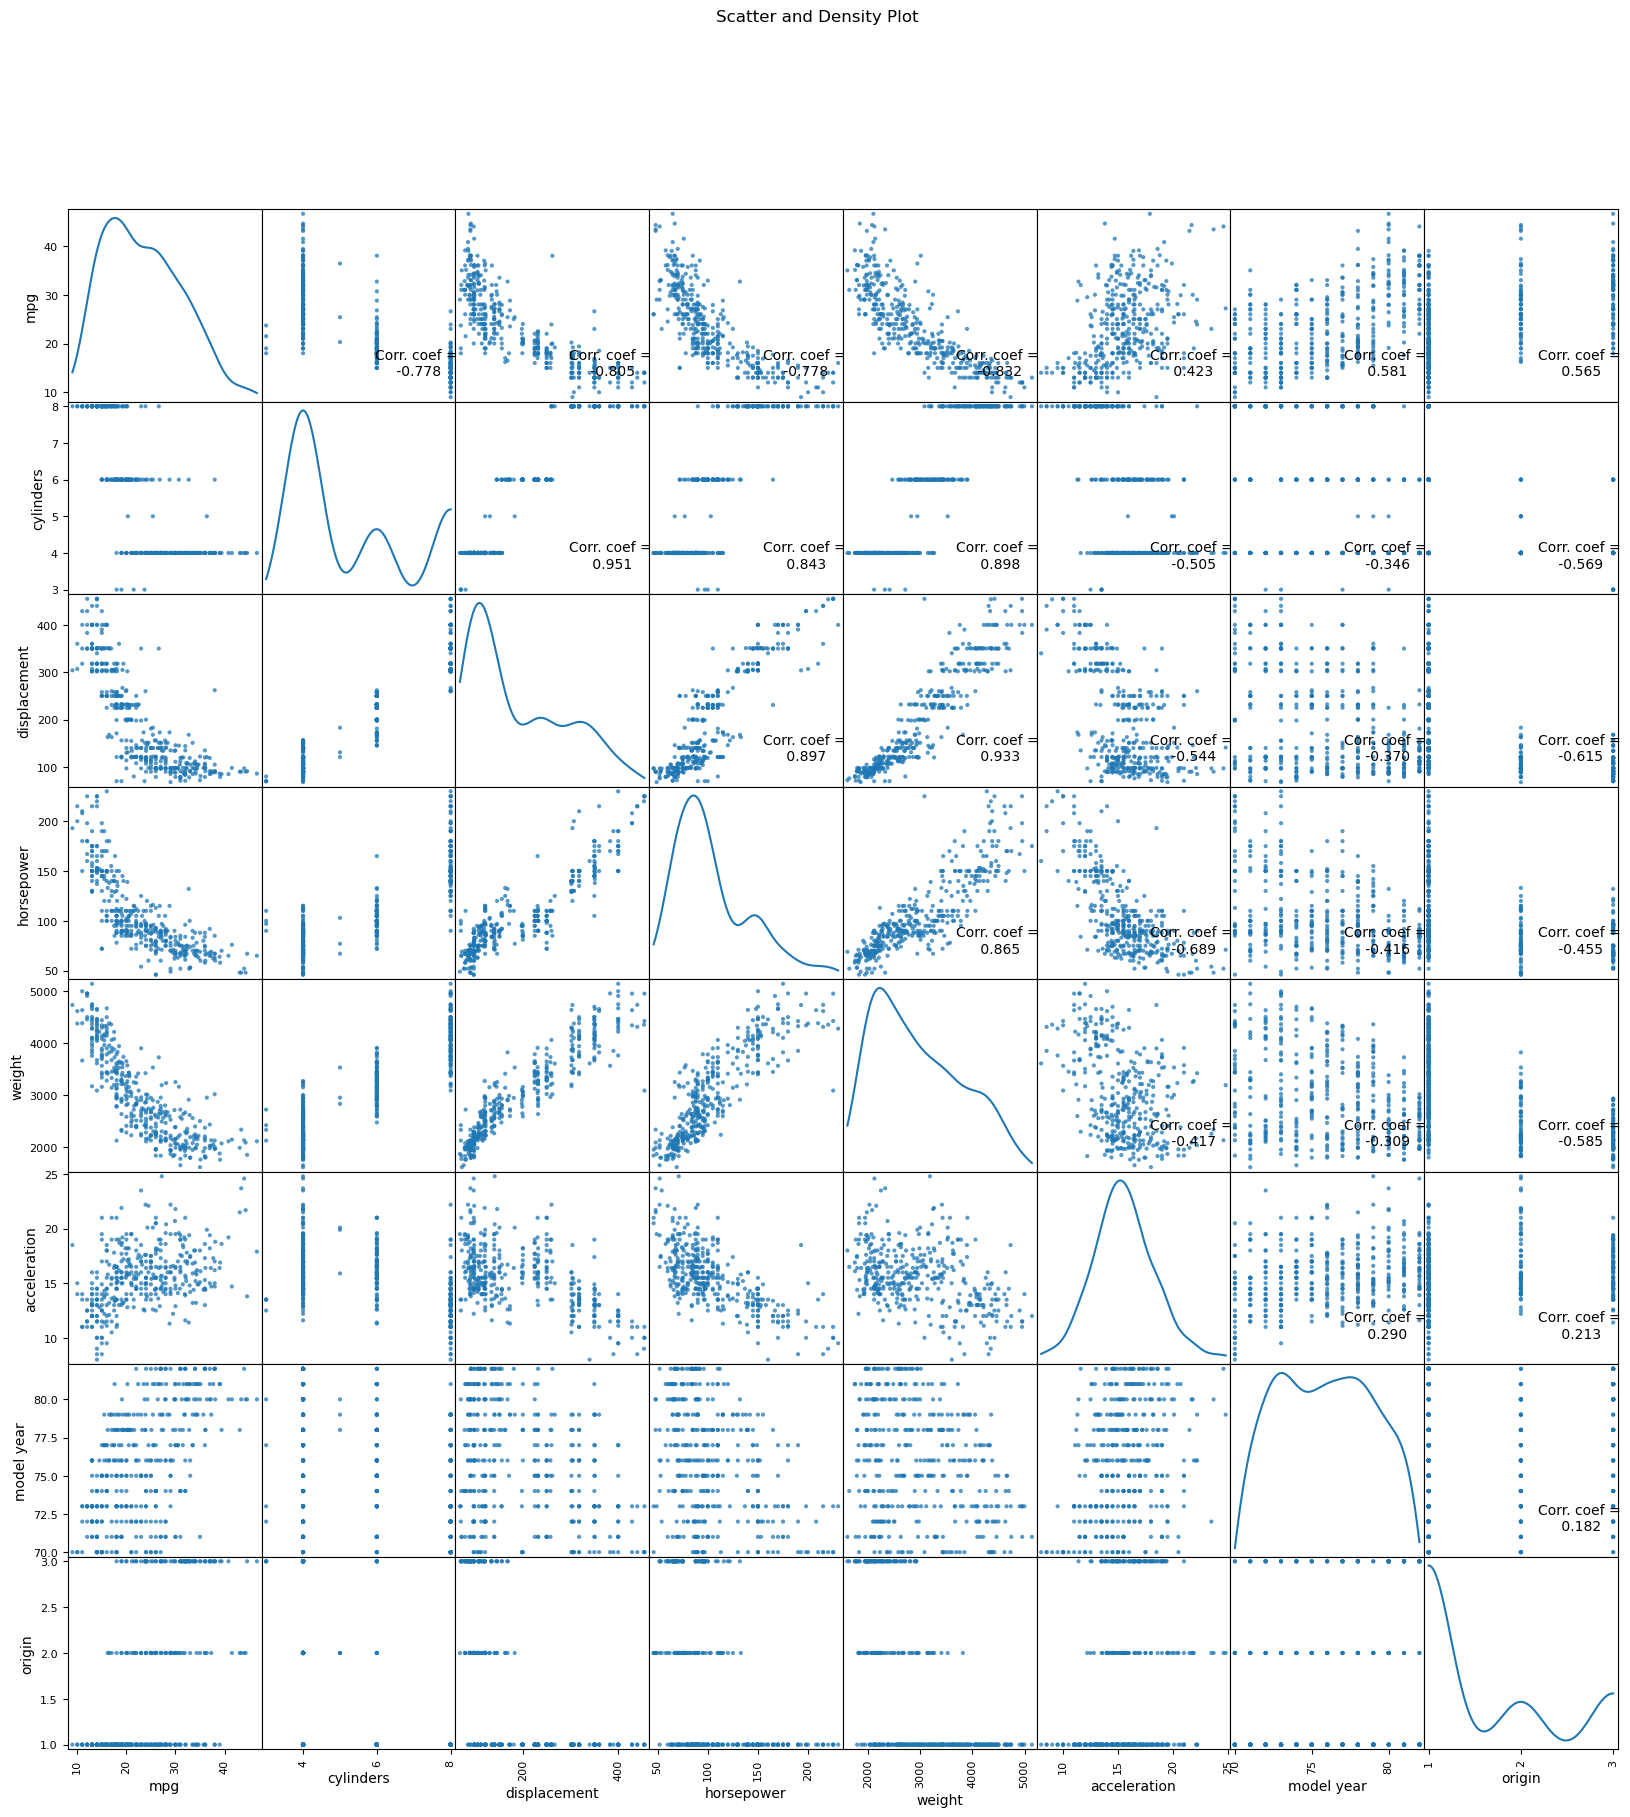

(392, 9)

In [79]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef =\n %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df, 20, 10)
df.shape
df.dropna().shape

Good Things
* We have good distribution of data across most of the model years with only the first few and last few years being smaller.
* The original intent of this dataset was to help predict the MPG attribute based on other variables.  We have a lot of useful info to help us do that.

Bad Things
* Origin doesn't seem to be super useful.  Seems like it is either 1, 2 or 3 - its a multi-valued discrete, but we don't really know what it corresponds to.  My guess is that it is "european", "us" or "asian", but I don't know for sure without more documentation.
* We only have 398 records.  And out of those 6 of them are missing data - although all of that missing data seems to be in the horsepower column, so we will likely have to drop those records, if we want to use Horsepower.
* One thing that would have been nice is to have more cars with origin 2/3 - this is very heavily distributed on origin = 1.

## 7(c)

> (c) (2 points) For the horsepower attribute:
> 1. Calculate the percentiles in increments of 10, the mean, median, range, and
variance.

In [80]:
import numpy as np

horsepower = df.dropna().horsepower
for percentile in range(0, 110, 10):
    print("horsepower " , percentile, " percentile = ", np.percentile(horsepower, percentile))

print("horsepower mean = ", np.mean(horsepower))
print("horsepower median  = ", np.mean(horsepower))
print("horsepower range = ", np.min(horsepower), " to ", np.max(horsepower))
print("horsepower variance = ", np.var(horsepower))


horsepower  0  percentile =  46.0
horsepower  10  percentile =  67.0
horsepower  20  percentile =  72.0
horsepower  30  percentile =  80.0
horsepower  40  percentile =  88.0
horsepower  50  percentile =  93.5
horsepower  60  percentile =  100.0
horsepower  70  percentile =  110.0
horsepower  80  percentile =  140.0
horsepower  90  percentile =  157.69998
horsepower  100  percentile =  230.0
horsepower mean =  104.46939
horsepower median  =  104.46939
horsepower range =  46.0  to  230.0
horsepower variance =  1477.7882080078125


> 2. Plot a histogram of the attribute using 10 or 20 bins.

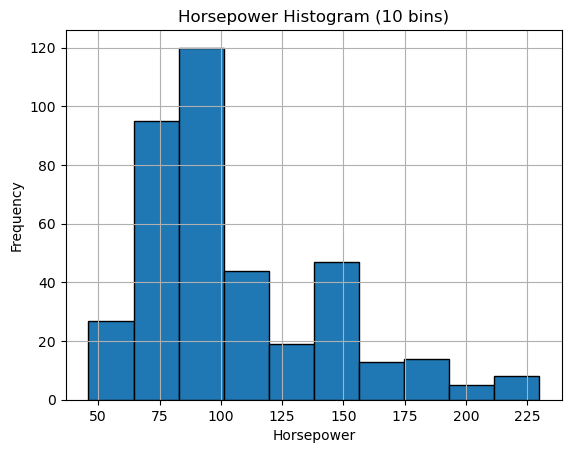

In [81]:
import matplotlib.pyplot as plt

df.hist(column='horsepower', bins=10, edgecolor='black')
plt.xlabel("Horsepower")
plt.ylabel("Frequency")
plt.title("Horsepower Histogram (10 bins)")
plt.show()

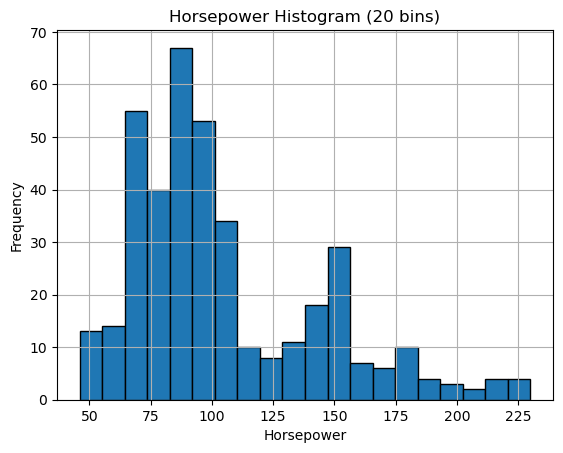

In [82]:
df.hist(column='horsepower', bins=20, edgecolor='black')
plt.xlabel("Horsepower")
plt.ylabel("Frequency")
plt.title("Horsepower Histogram (20 bins)")
plt.show()

## 7(d)
> (d) (2 points) Use the discrete attributes as if they were continuous. For the set of all
attributes in the dataset except for car-name, calculate 1) the covariance matrix
and 2) the correlation matrix of these attributes. Construct a visualization of each
of these matrices to more easily understand them.

In [83]:
cov = df.cov(numeric_only=True)
cov

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,61.089610,-10.308911,-655.402314,-233.857924,-5505.211705,9.058929,16.741163,3.532185
cylinders,-10.308911,2.893415,168.623214,55.348244,1290.695575,-2.370842,-2.193499,-0.767477
displacement,-655.402314,168.623214,10872.199152,3614.033744,82368.423240,-156.332975,-142.717137,-50.964989
horsepower,-233.857924,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,-59.036432,-14.112741
weight,-5505.211705,1290.695575,82368.423240,28265.620231,717140.990526,-974.899000,-959.946344,-394.639330
acceleration,9.058929,-2.370842,-156.332975,-73.186967,-974.899000,7.604848,2.938105,0.455354
model year,16.741163,-2.193499,-142.717137,-59.036432,-959.946344,2.938105,13.672443,0.535790
origin,3.532185,-0.767477,-50.964989,-14.112741,-394.639330,0.455354,0.535790,0.643292


In [84]:
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


<Figure size 1900x1500 with 0 Axes>

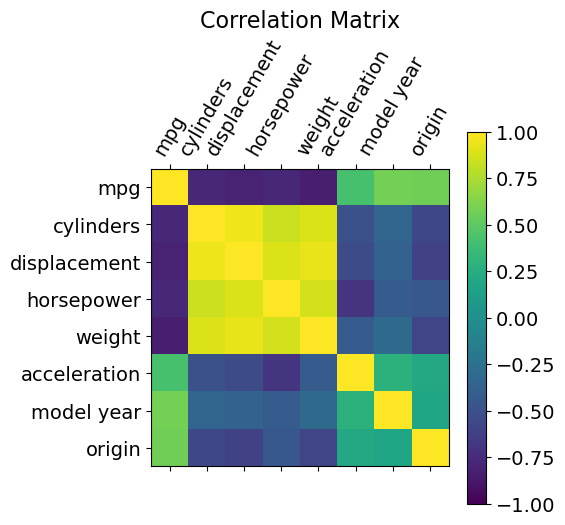

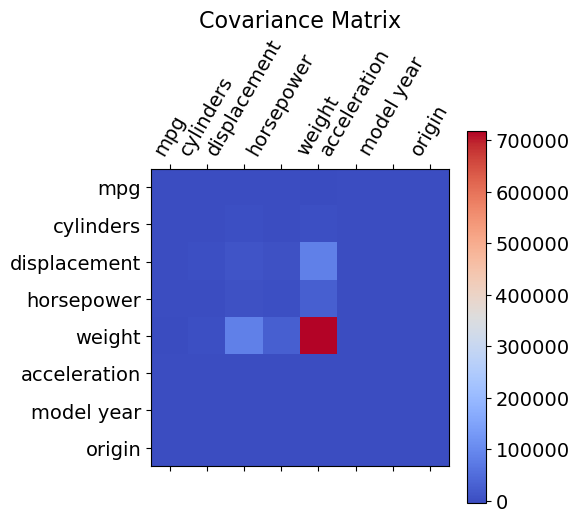

In [85]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

f = plt.figure(figsize=(19, 15))
plt.matshow(corr)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=60)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
plt.clim(-1, 1)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

plt.matshow(cov, cmap=plt.cm.coolwarm)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=60)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
plt.clim(np.min(cov), np.max(cov))
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Covariance Matrix', fontsize=16);
plt.show()


This is basically telling us that weight and displacement have much larger scales than the other measurements, so in the covariance matrix, their values dwarf the others.

## 7(e)
> (2 points) If you had to remove 2 of the attributes above from the dataset based
on these two matrices, which attributes would you remove and why? Explain your
answer.

I'd likely remove weight and cylindars
Weight is highly correlated to both displacement and weight, while cylinders is highly correlated to displacement and horsepower

Keeping both horesepower and displacement seem like a very good choice depending on the use.
We might choose to discard horsepower because it has missing data, or to predict horsepower from cylinders and displacement.

## 7(f)
> (f) (10 points) Apply Principal Components Analysis to reduce the dimensionality of
the full dataset. How many dimensions does the original dataset contain? How
many dimensions are obtained after PCA? How much of the variance do they ex-
plain? Include in your report the linear combinations that define the first new
attribute (= component) obtained. Look at the results and elaborate on any inter-
esting observations you can make about the results.

In [86]:
# first we scale the values
from sklearn.preprocessing import StandardScaler
numeric_df = df.dropna().drop('car name', axis=1)
scaled_dataset = StandardScaler().fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_dataset, columns=numeric_df.columns)
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641
...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021295,1.636410,-0.716641
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641


In [87]:
# lets make sure that we scaled things properly
np.mean(scaled_df, axis=0), np.std(scaled_df, axis=0)

(mpg             0.000000e+00
 cylinders      -1.946274e-08
 displacement    3.892548e-08
 horsepower      0.000000e+00
 weight         -9.731370e-09
 acceleration    9.731370e-09
 model year     -3.892548e-08
 origin          2.919411e-08
 dtype: float32,
 mpg             1.000000
 cylinders       1.000000
 displacement    1.000000
 horsepower      0.999999
 weight          1.000000
 acceleration    1.000000
 model year      0.999999
 origin          1.000001
 dtype: float32)

In [88]:
from sklearn.decomposition import PCA

pca = PCA()
pca_mpg = pca.fit_transform(scaled_df)
pca_mpg_df = pd.DataFrame(data=pca_mpg)
print(pca.explained_variance_ratio_)

[0.671984   0.11795797 0.10145542 0.0607696  0.02285325 0.01429019
 0.00669331 0.00399626]


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

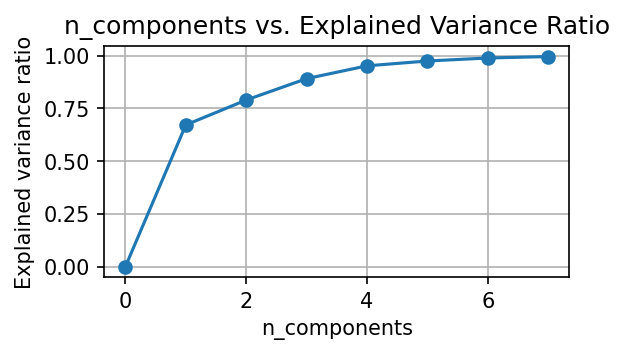

In [89]:
# We can plot the explained variance ratio for each of the components, and choose how many we want to keep
var_ratio = []
nums = range(8)

for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))
 
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

Seems to me that keeping about 4 of the components makes the most sense.  With 4 components kept, we would explain 95% of the variance.

In [90]:
# show the constituant components for each of the components (0-7) 
print(pd.DataFrame(pca.components_,columns=scaled_df.columns))


        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.385862   0.402388      0.416444    0.401836  0.401576     -0.264731   
1  0.076632   0.138429      0.126324   -0.111481  0.211019      0.416904   
2 -0.292286  -0.072240     -0.074237   -0.236055  0.000893      0.639433   
3 -0.099983   0.216034      0.135814    0.119717  0.322469      0.492809   
4  0.740367   0.482615      0.303316   -0.084266 -0.131273      0.097733   
5  0.387350  -0.530931     -0.006990    0.666707  0.235859      0.202932   
6  0.195883  -0.278788      0.084245   -0.535055  0.722014     -0.228913   

   model year    origin  
0   -0.213868 -0.277868  
1    0.690460 -0.501503  
2   -0.587192 -0.307322  
3    0.106021  0.743282  
4   -0.301344 -0.047394  
5   -0.110025 -0.120867  
6   -0.125014  0.034528  


Based on this it seems like for our top component all of the values are involved.  But that cylindars, displacement, horsepower and weight are most closely correlated.

The other intersting factor that I see in the PCA is that I would have expected the first variable to not combine quite so many of the aspects so signifcantly.  Though I suppose that is because we have displacement, horsepower and weight that are all so strongly correlated.  If we had dropped two of those we might have seen them decrease.

In [91]:
pca2 = PCA()
mpg2 = scaled_df.drop('weight', axis=1).drop('cylinders', axis=1)
pca2_mpg = pca2.fit_transform(mpg2)
pca2_mpg_df = pd.DataFrame(data=pca2_mpg)
print(pca2.explained_variance_ratio_)
print(pd.DataFrame(pca2.components_,columns=mpg2.columns))


[0.62059724 0.14572942 0.13430879 0.06203007 0.02578817 0.01154629]
        mpg  displacement  horsepower  acceleration  model year    origin
0 -0.466128      0.481086    0.480797     -0.347857   -0.297437 -0.332630
1  0.038906     -0.176921    0.078480     -0.395788   -0.549811  0.708580
2  0.273971      0.112142    0.242213     -0.611382    0.672467  0.166424
3 -0.303770      0.339675    0.320483      0.523299    0.284200  0.578812
4  0.782155      0.426522    0.279800      0.220268   -0.275844 -0.058441
5  0.045915     -0.653742    0.723195      0.161858    0.012964 -0.145381


So by dropping those highly correlated columns, we definitely see that the main column gets weighted higher.